In [1]:
import os
import cv2 as cv
import numpy as np
import ipynb.fs.defs.Utils as Utils
import ipynb.fs.defs.FeatureMatching as FeatureMatching
import ipynb.fs.defs.GraphBuilding as GraphBuilding
import ipynb.fs.defs.BasicStitching as BasicStitching
import ipynb.fs.defs.SimpleGraphStitching as SimpleGraphStitching
import ipynb.fs.defs.MultiGraphStitching as MultiGraphStitching
import ipynb.fs.defs.MultiPatchStitching as MultiPatchStitching

In [2]:
#Directories
dataset_name = 'snow_dataset'
dataset_dir = f'datasets/{dataset_name}'
stitching_dir = "stitched"
partial_results_dir = "partial"

In [3]:
#global variables
save_output = True
save_images = True
simple_output_dir ="output_simple"
multi_output_dir ="output_multi"
results_dir = "results"
verbose = False
noisy_matching = False

In [4]:
#graph parameters
matching_threshold = 0.7
number_of_matches = 1
matches_th = 20
RANSACmaxIters = 1000
load_multi_matrices = False

In [5]:
#general stitching parameters
automatic_idx_computation = True
idx_ref = 0
idxs = None
beautify = True
warp_shape = [10000,10000]

In [6]:
#basic stitching parameters
basic_stitching_dir = "basic_stitching"
#simple graph stitching parameters
simple_graph_stitching_dir = "simple_graph"
#multigraph stitching parameters
multi_graph_stitching_dir = "multi_graph"
#multipatch stitching parameters
multi_patch_stitching_dir = "multi_patch"

In [7]:
#Load images from the folder
imgs = Utils.load_images_from_folder(dataset_dir)

In [8]:
#compute normalization matrices
T_norm = Utils.get_normalization_matrix(imgs)

In [9]:
#verify if single graph matrices are already computed, otherwise compute them
matches_dict, weight_matrix = FeatureMatching.get_feature_matches(dataset_name,
            imgs,
            T_norm,
            matching_threshold = matching_threshold,
            number_of_matches = number_of_matches,
            matches_th = matches_th,
            RANSACmaxIters = RANSACmaxIters,
            save_output = save_output,
            save_images = save_images,
            output_dir = simple_output_dir,
            results_dir = results_dir,
            noisy_matching = noisy_matching,
            verbose = verbose
           )

In [10]:
M, Z, adj_matrix = GraphBuilding.build_simple_graph_matrices(dataset_name,
            imgs,
            matches_dict,
            output_dir = simple_output_dir,
            verbose = verbose,
            save_output = save_output
           )

M_multi, Z_multi, C_multi, adj_matrix_multi = GraphBuilding.build_multi_graph_matrices(dataset_name,
            imgs,
            matches_dict,
            output_dir = multi_output_dir,
            verbose = verbose,
            save_output = save_output
           )

In [11]:
if automatic_idx_computation:
    idx_ref = Utils.get_reference_node(adj_matrix)

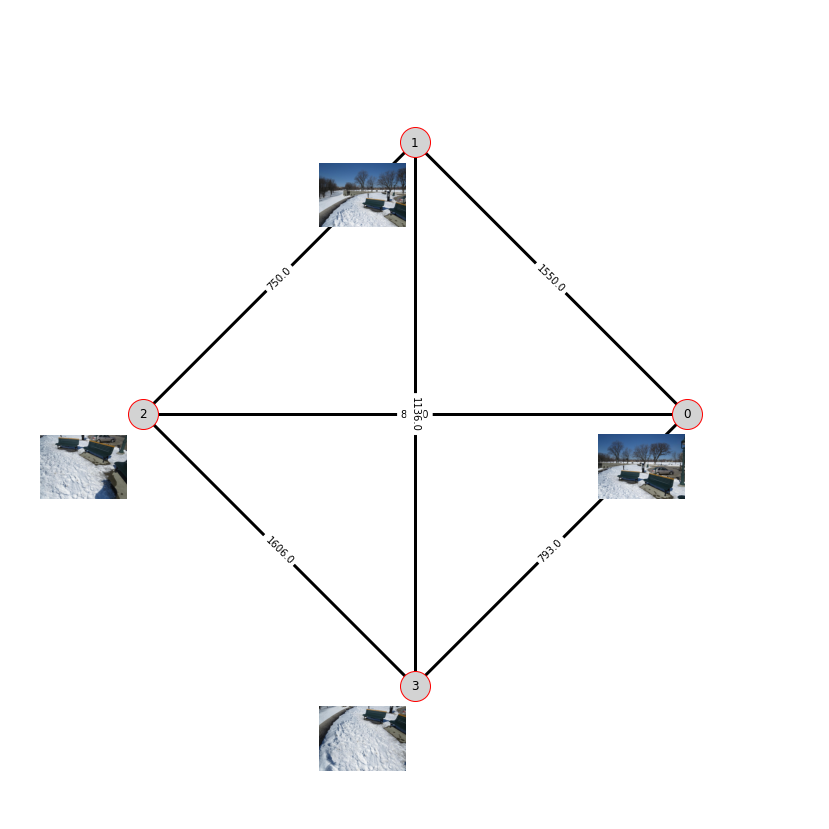

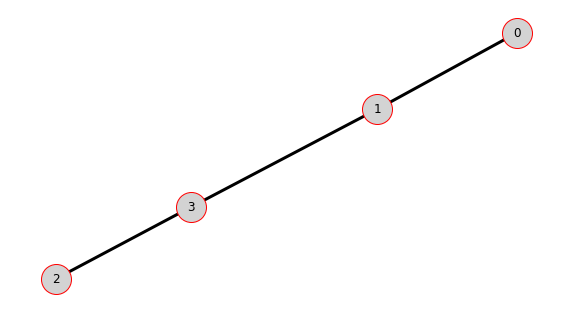

In [12]:
#basic stitching without synchronization
H_basic, basic_stitched_image = BasicStitching.basic_stitching(dataset_name,
                    imgs,
                    T_norm,
                    Z, 
                    adj_matrix, 
                    weight_matrix,
                    idx_ref = idx_ref,
                    verbose = verbose,
                    save_output = save_output,
                    beautify = beautify,
                    stitching_dir = stitching_dir,
                    partial_results_dir = partial_results_dir,
                    basic_stitching_dir = basic_stitching_dir,
                    warp_shape = warp_shape
                   )

In [13]:
H_simple_graph, simple_graph_stitched_image = SimpleGraphStitching.simple_graph_stitching(dataset_name,
                            imgs,
                            T_norm,
                            M, 
                            idx_ref = idx_ref,
                            idxs = idxs,
                            verbose = verbose,
                            save_output = save_output,
                            beautify = beautify,
                            stitching_dir = stitching_dir,
                            graph_stitching_dir = simple_graph_stitching_dir,
                            warp_shape = warp_shape )

In [14]:
H_multi_graph, multi_graph_stitched_image = MultiGraphStitching.multi_graph_stitching(dataset_name,
                            imgs,
                            T_norm,
                            M_multi, 
                            C_multi,
                            idx_ref = idx_ref,
                            idxs = idxs,
                            verbose = verbose,
                            save_output = save_output,
                            beautify = beautify,
                            stitching_dir = stitching_dir,
                            graph_stitching_dir = multi_graph_stitching_dir,
                            warp_shape = warp_shape )

Clusters  1 0
Clusters  1 0
Clusters  1 0
Clusters  1 0
Clusters  0 1
Clusters  0 1
Clusters  0 1
Clusters  0 1


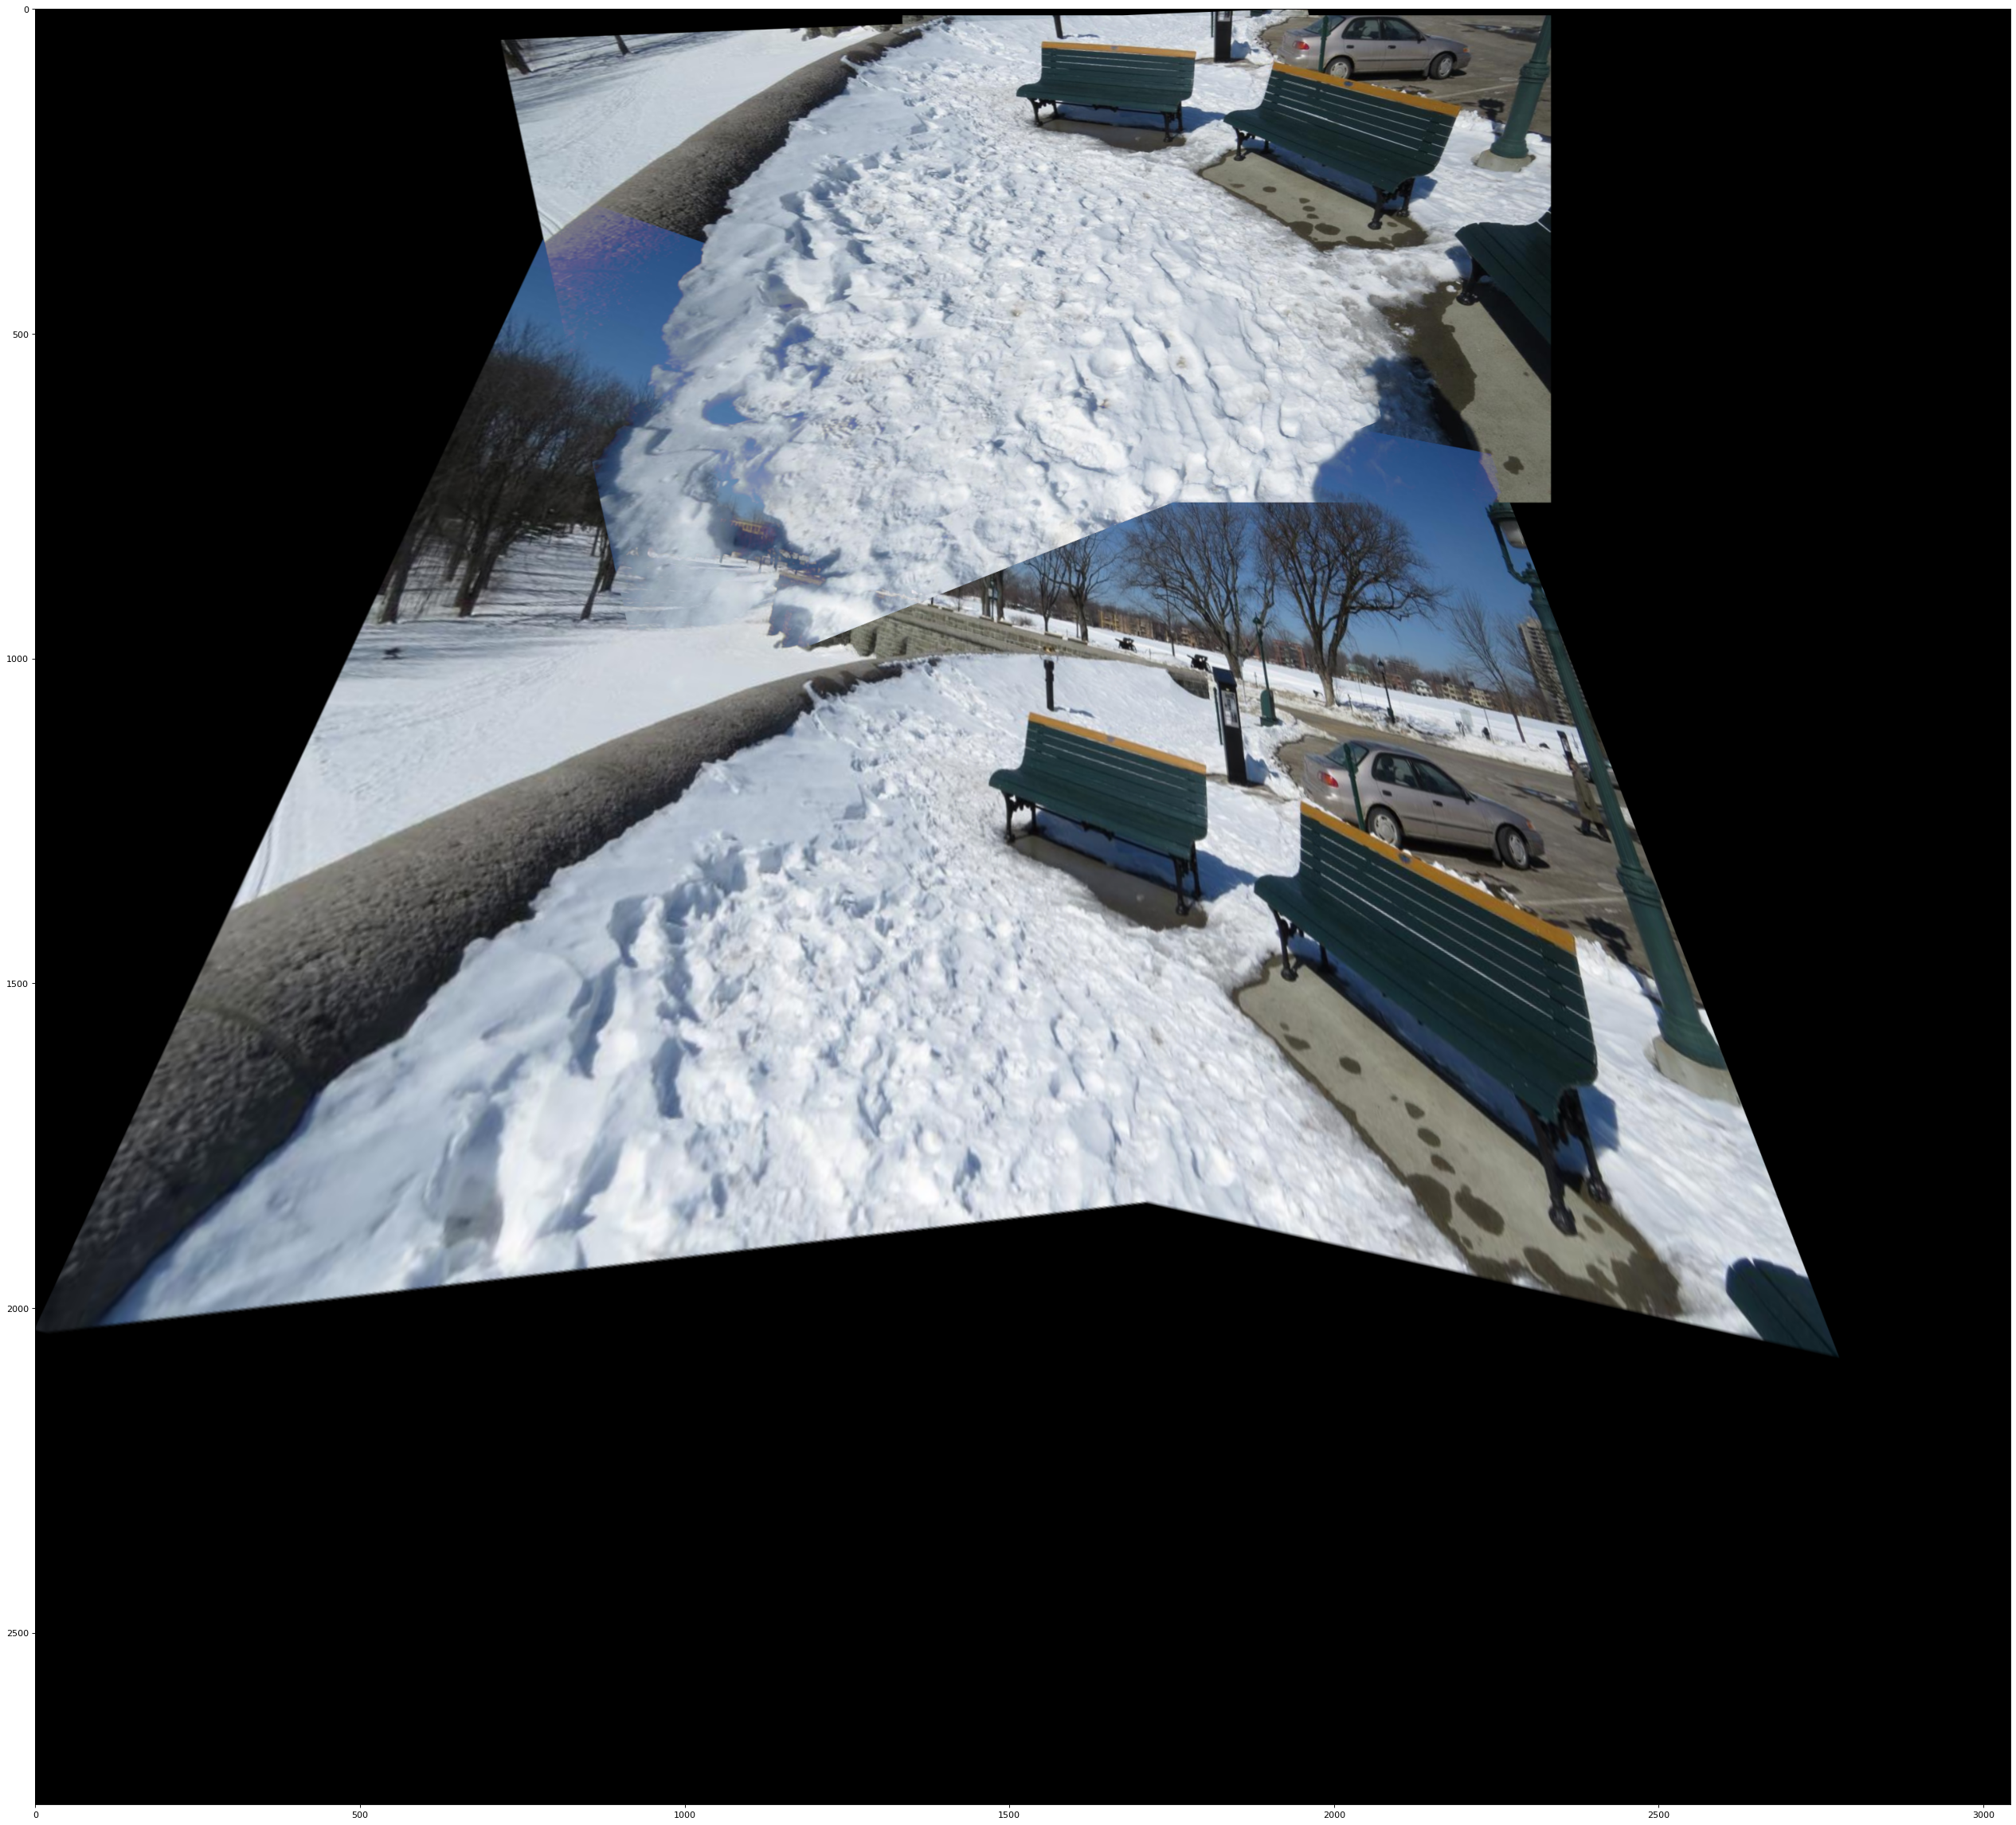

In [15]:
H_multi_graph, multi_graph_stitched_image = MultiPatchStitching.multi_patch_stitching(dataset_name,
                        imgs,
                        T_norm,
                        Z, #Matrix containing the homographies between images
                        adj_matrix, #Adjacency matrix of the graph built according to the matches between the images
                        weight_matrix, #Weight matrix of the graph built according to the matches between the images
                        verbose = verbose,
                        save_output = save_output,
                        beautify = beautify,
                        stitching_dir = stitching_dir,
                        graph_stitching_dir = multi_patch_stitching_dir,
                        warp_shape = warp_shape )